## Useful code for processing test data

### Imports

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Time test

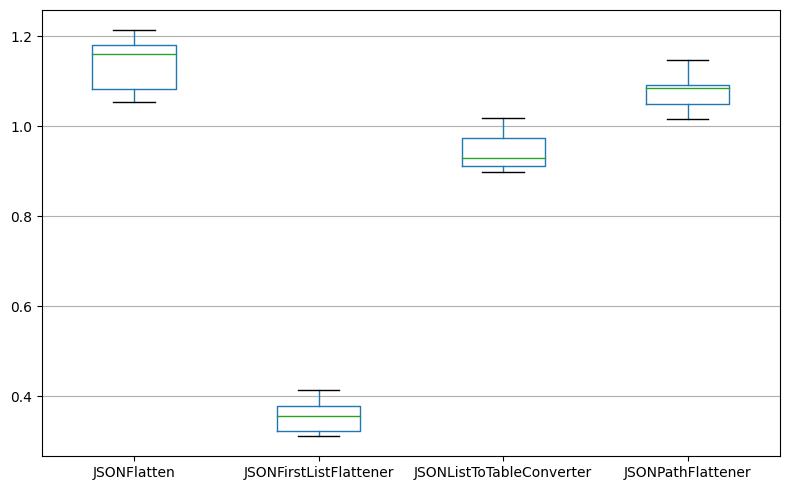

In [46]:
test_files = [
    ("time/JSONFlatten.txt", "JSONFlatten"),
    ("time/JSONFirstListFlattener.txt", "JSONFirstListFlattener"),
    ("time/JSONListToTableConverter.txt", "JSONListToTableConverter"),
    ("time/JSONPathFlattener.txt", "JSONPathFlattener"),
]

dummy_file = "time/JSONDummy.txt"
with open(dummy_file) as file:
    dummy_values = np.array(file.read().split()).astype(float)

df_time_duration = pd.DataFrame()

for filename, plot_name in test_files:
    values = np.array([])
    with open(filename) as file:
        unclean_values = np.array(file.read().split()).astype(float)
        values = unclean_values - dummy_values

        mask = np.ones(len(values), dtype=bool)
        mask[np.argmin(values)] = mask[np.argmax(values)] = False
        values = values[mask]

    df_time_duration[plot_name] = pd.DataFrame(values)

axes = df_time_duration.boxplot(figsize=(8,5), grid=False)
axes.grid(axis='y')
plt.tight_layout()
plt.show()

### CPU and Memory Usage

In [44]:
files = [
    ("cpu-memory/example_1.txt", "example_1"),
    ("cpu-memory/example_2.txt", "example_2"),
    ("cpu-memory/example_3.txt", "example_3"),
    ("cpu-memory/example_4.txt", "example_4")
]

df_memory_usage = pd.DataFrame()
df_cpu_usage = pd.DataFrame()

for (file, plot_name) in files:
    df = pd.read_csv(file, sep=";")
    df_memory_usage[plot_name] = df.iloc[:, 0]
    df_cpu_usage[plot_name] = df.iloc[:, 1]


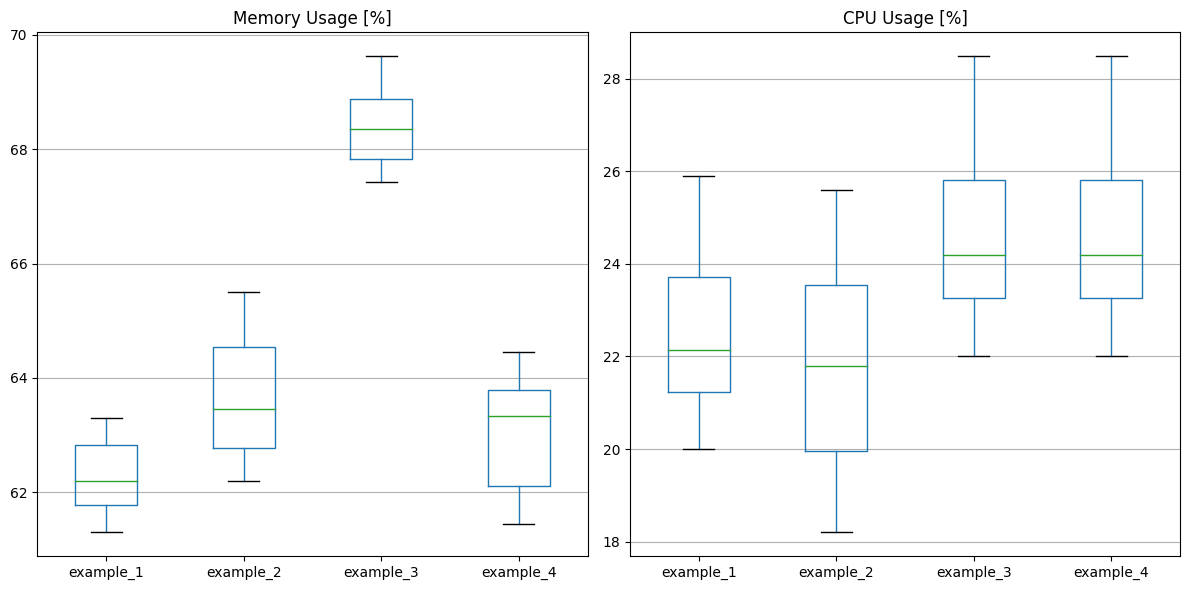

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
final_plots = [
    (df_memory_usage, ax1, "Memory Usage [%]"),
    (df_cpu_usage, ax2, "CPU Usage [%]")
]

for (final_df, sub_ax, title) in final_plots:
    final_df.boxplot(ax=sub_ax, grid=False)
    sub_ax.grid(axis='y')
    sub_ax.set_title(title)

plt.tight_layout()
plt.show()